# 미적분 문제 풀기

* 여기서는 함수의 미분과 적분을 SymPy를 이용하여 다룬다.

## 함수란?

* Wikipedia에서 : In mathematics, a function is a relation between a set of inputs and a set of permissible outputs with the property that each input is related to exactly one output.
* ‘x’는 독립변수
* 함수 도메인(Function Domain)는 유효한 입력값의 집합
* 범위 : 함수의 결과집합

참고 : https://en.wikipedia.org/wiki/Function_(mathematics)

## 일반적인 수학 함수에 대한 개요

* Python에서는 math library를 이용하여 일반적인 수학함수를 사용할 수 있다.
* math.sin(), math.cos(), math.log(), math.log2(), math.log10(), math.exp() 등이 있다.
* 이러한 모든 함수의 단점은 부호수식으로 작업하기에는 부적합하다는 점이다.


In [1]:
import math
print(math.sin(math.pi/2))

1.0


In [2]:
print(x)

NameError: name 'x' is not defined

In [3]:
from sympy import Symbol
theta = Symbol('theta')
print math.sin(theta) + math.sin(theta)

TypeError: can't convert expression to float

In [4]:
import sympy
sympy.sin(theta) + sympy.sin(theta)

2*sin(theta)

## EXAMPLE II

특정한 각도 $\theta$로 공을 던졌을때, 가장 높은 지점에 도달할때의 시간 t는?

$u \sin(\theta) - g t = 0$

In [ ]:
theta = 45
u = 10
for t in range(0, 100):
    f = u * sin(theta) - 9.8 * t
    if f == 0.:
        print (t)

In [5]:
from sympy import sin, solve, Symbol
u = Symbol('u')
t = Symbol('t')
g = Symbol('g')
theta = Symbol('theta')
print solve(u * sin(theta) - g * t, t)

[u*sin(theta)/g]


## SymPy

In [6]:
from sympy import Symbol
x = Symbol('x')
if (x+5) > 0:
    print ('Do Something')
else:
    print ('Do Something Else')

TypeError: cannot determine truth value of Relational

In [7]:
x = Symbol('x', positive=True) # Hint!!
if (x+5) > 0:
    print 'Do Something'
else:
    print 'Do Something Else'

Do Something


In [8]:
x = Symbol('x', negative=True) # Hint!!
if (x+5) > 0:
    print 'Do Something'
else:
    print 'Do Something Else'

TypeError: cannot determine truth value of Relational

## 함수의 극한 계산기

$$
\lim_{x\rightarrow \infty}\frac{1}{x}=0
$$

In [15]:
from sympy import Limit, Symbol, S
x = Symbol('x')
print(Limit(1/x, x, 0, dir='-').doit())

-oo


In [ ]:
l = Limit(1/x, x, S.Infinity)

In [ ]:
l.doit()

$$
\lim_{x\rightarrow -0}\frac{1}{x}=?
$$

In [16]:
print Limit(1/x, x, 0, dir='-').doit()

-oo


In [ ]:
print Limit(1/x, x, 0, dir='+').doit()

$$
\lim_{x \rightarrow 0}\frac{\sin(x)}{x}=?
$$

In [17]:
from sympy import Symbol, sin
print Limit(sin(x)/x, x, 0).doit()

1


## 복리

$$
A = \left( 1+\frac{1}{n} \right)^{n}
$$

In [ ]:
from sympy import Limit, Symbol, S
n = Symbol('n')
print Limit((1+1/n)**n, n, S.Infinity).doit()

* 원금 P, 이자율 r과 기간(년) t에 대한 복리이자는 다음과 같은 공식으로...

$$
A = P \left( 1 + \frac{r}{n} \right) ^{nt} $$

In [18]:
from sympy import Symbol, Limit, S
p = Symbol('p', positive = True)
r = Symbol('r', positive = True)
t = Symbol('t', positive = True)
print Limit(p*(1+r/n)**(n*t), n, S.Infinity).doit()

NameError: name 'n' is not defined

## 실시간 변화율

자동차의 이동거리는 다음과 같은 함수로 주어진다고 생각하자.

$$ S(t) = 5t^2+2t+8 $$

만일 $t_{2}>t_{1}$인 시간 $t_1$과 $t_2$ 동안 이동한 거리를 단위 시간당 거리로 표현한다면,

$$
\frac{S(t_2)-S(t_1)}{t_2-t_1}
$$

이를 다음과 같이 변화시키자.

$$
\frac{S(t_1+\delta_t)-S(t_1)}{\delta_{t}}
$$

이는 $t_1$에서의 $\delta_t$만큼의 시간 동안의 평균 속도를 계산한 것과 같다. 이때 $\delta_t$를 $\infty$로 보내는 극한을 취하면, 

$$
\lim_{\delta_t \rightarrow 0} \frac{S(t_{1}+\delta_t)-S(t_1)}{\delta_{t}}
$$

미분꼴로 표현할 수 있게 된다.

In [19]:
from sympy import Symbol, Limit
t = Symbol('t')
St = 5*t**2+2*t+8

In [20]:
t1 = Symbol('t1')
delta_t = Symbol('delta_t')

In [21]:
St1 = St.subs({t: t1}) # St함수에서 t에 t1을 대입
St1_delta = St.subs({t: t1 + delta_t})

In [22]:
print St1_delta

2*delta_t + 2*t1 + 5*(delta_t + t1)**2 + 8


In [23]:
print Limit((St1_delta - St1)/delta_t, delta_t, 0).doit()

10*t1 + 2


## 함수의 미분

* 이걸 쫌더 편하게 해보자

In [24]:
from sympy import Symbol, Derivative
Derivative(St, t)

Derivative(5*t**2 + 2*t + 8, t)

In [25]:
d = Derivative(St, t)
print d.doit()

10*t + 2


In [ ]:
print d.doit().subs({t:t1})

In [26]:
print d.doit().subs({t:1})

12


* Problem!!

$$ (x^3+x^2+x) (x^2+x) $$

In [27]:
from sympy import Symbol, Derivative, sympify, pprint
from sympy.core.sympify import SympifyError
x = Symbol('x')
f = (x**3+x**2+x)*(x**2+x)
print Derivative(f, x, 3).doit()


(2*x + 1)*(x**3 + x**2 + x) + (x**2 + x)*(3*x**2 + 2*x + 1)


* Problem
$$
\frac{\partial f}{\partial x} = 2y + y^2
$$

## 고차 미분과 최대, 최소값 구하기

1차 미분과 2차 미분의 결과를 이용하여 최대값과 최소값을 구하는 방식에 대한 것이다.

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x = np.linspace(-5,5,1000)
y = x**5-30*x**3+50*x

In [ ]:
plt.plot(x, y)

In [ ]:
from sympy import Symbol, solve, Derivative
x = Symbol('x')
f = x**5 - 30*x**3+50*x
d1 = Derivative(f, x).doit()

$f'(x)=0$을 계산해보자

In [ ]:
critical_points = solve(d1)

In [ ]:
print critical_points

In [ ]:
d2 = Derivative(f, x, 2).doit() # 2차 미분

In [ ]:
for val in critical_points:
    print d2.subs({x:val}).evalf() # evaluation

In [ ]:
for val in critical_points:
    print f.subs({x:val}).evalf() # evaluation

## Gradient Ascent를 이용한 전역 최대값 알아내기

* 반복적으로 수행하는 접근법

$$
t_{flight}=2 \frac{u \sin{\theta}}{g} \\
R=u\cos{\theta} \times \frac{2u\sin{\theta}}{g}=\frac{u^2 \sin{2 \theta}}{g}
$$

$$
\theta_{new} = \theta_{old} + \lambda \frac{dR}{d \theta}
$$

을 이용한다.

1. 앞의 방정식을 이용해 $\theta_{new}$를 계산한다.
2. $\theta_{new} - \theta_{old}$ 절대차이가 값 $\epsilon$보다 크다면, $\theta_{old}=\theta_{new}$라고 설정하고 1단계로 리턴한다. 그렇지 않다면 3단계로 간다.
3. $\theta_{new}$는 $\theta$의 추정값으로 이 값에 대해 R은 최대값을 갖는다.

In [ ]:
import math
from sympy import Derivative, Symbol, sin

def grad_ascent(x0, f1x, x):
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old + step_size * f1x.subs({x:x_old}).evalf()
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old + step_size * f1x.subs({x:x_old}).evalf()
        
    return x_new

def find_max_theta(R, theta):
    R1theta = Derivative(R, theta).doit()
    theta0 = -2
    theta_max = grad_ascent(theta0, R1theta, theta)
    return theta_max

g = 9.8
u = 25
theta = Symbol('theta')
R = (u**2)*sin(2*theta)/g

theta_max = find_max_theta(R, theta)
print math.degrees(theta_max)
print R.subs({theta:theta_max})

In [ ]:
#P193: This is the program corresponding to Figure 7-5
'''
Find the angle at which the projectile has maximum range for
a fixed velocty, u. This also shows the intermediate points.
'''

import math
import matplotlib.pyplot as plt
from sympy import Derivative, Symbol, sin, cos, solve

def plot_range_theta(u):
    g = 9.8
    angles = range(0, 90, 1)
    R = [u**2*math.sin(math.radians(2*angle))/g for angle in angles]
    plt.plot(angles, R)
    # Use LaTex for the X-axis label
    #plt.rc('text', usetex=True)
    plt.plot(angles, R)
    #plt.xlabel(r'$\theta$ : Angle of projection (degrees)')
    plt.ylabel('R: Distance traveled by projectile (meters)')

def grad_ascent(x0, f1x):
    theta = Symbol('theta')
    epsilon =  1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old + step_size*f1x.subs({theta:x_old}).evalf()

    X = []
    while abs(x_old - x_new) > epsilon:
        X.append(x_new)
        x_old = x_new
        x_new = x_old + step_size*f1x.subs({theta:x_old}).evalf()

    return x_new, X

def find_max_theta(R, theta):
    # Calculate the first derivative
    R1theta = Derivative(R, theta).doit()
    theta0 = 1e-3
    theta_max, X = grad_ascent(0.001, R1theta)
    return math.degrees(theta_max.evalf()), X

if __name__ == '__main__':
    g = 9.8
    # Assume initial velocity
    u = 25
    plot_range_theta(u)
    theta = Symbol('theta')
    # Expression for range
    R = u**2*sin(2*theta)/g
    theta_max, X = find_max_theta(R, theta)

    # calculate R for all theta's traversed
    Y = [u**2*math.sin(2*angle)/g for angle in X]
    X = [math.degrees(angle) for angle in X]
    plt.plot(X, Y, 'ro')
    plt.show()
    print('Theta: {0}, Max. Range: {1}'.format(theta_max, R.subs({theta:theta_max})))

## 초기값에 대한 경고

* 그래디언트 상승의 반복을 시작할 변수의 초기값은 알고리즘에서 매우 중요한 역할을 한다.


In [ ]:
import math
from sympy import Derivative, Symbol, sin

def grad_ascent(x0, f1x, x):
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old + step_size * f1x.subs({x:x_old}).evalf()
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old + step_size * f1x.subs({x:x_old}).evalf()
        
    return x_new

def find_max_theta(R, theta):
    R1theta = Derivative(R, theta).doit()
    theta0 = 0.5
    theta_max = grad_ascent(theta0, R1theta, theta)
    return theta_max

x = Symbol('x')
R = x**5 - 30*x**3 + 50*x

theta_max = find_max_theta(R, x)
print R.subs({x:theta_max})

In [ ]:
#P193: This is the program corresponding to Figure 7-5
'''
Find the angle at which the projectile has maximum range for
a fixed velocty, u. This also shows the intermediate points.
'''

import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Derivative, Symbol, sin, cos, solve

def plot_range_theta(u):
    g = 9.8
    angles = range(0, 90, 1)
    R = [u**2*math.sin(math.radians(2*angle))/g for angle in angles]
    plt.plot(angles, R)
    # Use LaTex for the X-axis label
    #plt.rc('text', usetex=True)
    plt.plot(angles, R)
    #plt.xlabel(r'$\theta$ : Angle of projection (degrees)')
    plt.ylabel('R: Distance traveled by projectile (meters)')

def grad_ascent(x0, f1x):
    theta = Symbol('theta')
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()

    X = []
    while abs(x_old - x_new) > epsilon:
        X.append(x_new)
        x_old = x_new
        x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()

    return x_new, X

def find_max_theta(R, theta):
    # Calculate the first derivative
    R1theta = Derivative(R, theta).doit()
    theta0 = -2
    theta_max, X = grad_ascent(theta0, R1theta)
    return theta_max.evalf(), X

x = Symbol('x')
R = x**5 - 30*x**3 + 50*x
R_max, X = find_max_theta(R, x)

X = np.linspace(-5, 5, 1000)
Y = X**5 - 30*X**3 + 50*X
plt.plot(X, Y)

# calculate R for all theta's traversed
Y = [angle**5 - 30*angle**3 + 50*angle for angle in X]
X = [angle for angle in X]
plt.plot(X, Y, 'ro')

## 단계 크기와 입실론의 역할

* $\lambda$는 Step Size를 적절히 설정해주어야 한다.
* 만일 이 크기가 작다면, 검색할때 천천히 찾아갈 것이고, 만일 이 크기가 크다면, 듬성 듬성 찾아가서 정답을 지나칠수도 있다.
* 알고리즘의 반복을 중단할 시점은 $\epsilon$으로 표현하는데, x의 값이 변하지 않음을 입증할 만큼 충분히 작은 값이어야 한다.
* 여기서는 $10^-6$을 사용했다.
* $f'(x)=0$의 해가 존재해야, 해를 찾을 수 있다. 


## 함수의 적분 계산

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

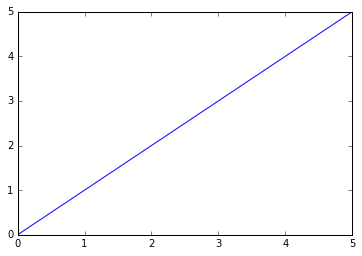

In [34]:
x = np.linspace(0, 5, 1000)
y = x
plt.plot(x, y)

In [35]:
from sympy import Integral, Symbol
x = Symbol('x')
k = Symbol('k')
Integral(k*x, x)

Integral(k*x, x)

In [36]:
print Integral(k*x, x).doit()

k*x**2/2


$$
\int_{0}^{2} k x dx = ?
$$

In [37]:
print Integral(k*x, (x, 0, 2)).doit()

2*k


하지만 모든 함수에 대해서 부정적분을 항상 가능한 것은 아니다!!